Vertical Expected Shot Map

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import sys
sys.path.append("..")

from expected_score_shot_map import *

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

In [2]:
font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-score-model/notebooks/visualisations/viz/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue

In [3]:
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-score-model/notebooks/visualisations/viz/mplstyle/dark_theme.mplstyle")

Load Data

In [4]:
df_shots = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-score-model/data/shot_chains_xScore.csv", low_memory=False)
df_shots.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Miss,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot,random100,ModellingFilter,ballUp,centreBounce,kickIn,possGain,throwIn,xGoals,xBehinds,xMiss,xGoals_normalised,xBehinds_normalised,xMiss_normalised,xScore
0,1,centreBounce,goal,11.0,1,13,39.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Kick,26.0,-21.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,0.0,0.0,0.0,Kick,Handball Received,Handball,Gather from Opposition,26.0,18.0,11.0,6.0,-21.0,-23.0,-26.0,-27.0,39.0,38.0,37.0,36.0,26.0,1.0,8.246211,52.0,21.0,56.080300,0.383818,21.991130,0.106164,6.082774,0.327040,18.737997,2704.0,3.951244,False,6,True,0,1,0,0,0,0.377382,0.423225,0.206330,0.374782,0.420309,0.204908,2.669003
1,6,possGain,goal,61.0,1,149,168.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Kick,35.0,19.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,6.0,0.0,6.0,Kick,Handball Received,Handball,Loose Ball Get,35.0,28.0,25.0,22.0,19.0,19.0,26.0,29.0,168.0,167.0,165.0,165.0,19.0,1.0,7.000000,43.0,19.0,47.010637,0.416065,23.838740,0.125105,7.167963,0.389831,22.335680,1849.0,3.761200,False,53,True,0,0,0,1,0,0.309688,0.365276,0.175964,0.363941,0.429268,0.206791,2.612916
2,10,possGain,goal,110.0,1,285,306.0,Brisbane Lions,Brisbane Lions,Joe Daniher,Joe_Daniher,Kick,50.0,24.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,12.0,0.0,12.0,Kick,Gather,Kick Inside 50 Result,Kick Into F50,50.0,50.0,50.0,-8.0,24.0,28.0,28.0,44.0,306.0,305.0,304.0,303.0,21.0,1.0,4.000000,28.0,24.0,36.878178,0.708626,40.601295,0.132764,7.606837,0.424028,24.295030,784.0,3.332205,False,83,False,0,0,0,1,0,0.362279,0.450421,0.230483,0.347282,0.431775,0.220943,2.515469
3,17,kickIn,behind,183.0,1,520,582.0,Sydney,Sydney,Isaac Heeney,Isaac_Heeney,Kick,46.0,-41.0,ineffective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,0,1,0,1,0,1,18.0,0.0,18.0,Kick,Mark On Lead,Kick Inside 50 Result,Kick Into F50,46.0,49.0,49.0,19.0,-41.0,-35.0,-35.0,-49.0,582.0,550.0,548.0,548.0,62.0,32.0,6.708204,32.0,41.0,52.009614,0.908067,52.028396,0.075999,4.354442,0.235146,13.472898,1024.0,3.465736,True,4,True,0,0,1,0,0,0.238486,0.395111,0.376768,0.236039,0.391057,0.372903,1.807294
4,21,possGain,goal,222.0,1,653,666.0,Sydney,Sydney,Logan McDonald,Logan_McDonald,Kick,34.0,15.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,0,6,18.0,1.0,17.0,Kick,Handball Received,Handball,Handball Received,34.0,19.0,10.0,7.0,15.0,17.0,20.0,20.0,666.0,664.0,662.0,662.0,13.0,2.0,15.132746,44.0,15.0,46.486557,0.328553,18.824710,0.130930,7.501763,0.408345,23.396432,1936.0,3.784190,False,39,True,0,0,0,1,0,0.490217,0.479007,0.195058,0.421047,0.411419,0.167535,2.937698


In [5]:
df_shots[['Score', 'xScore']].sum()

Score     66630.000000
xScore    65928.112271
dtype: float64

Plot Expected Score per Team

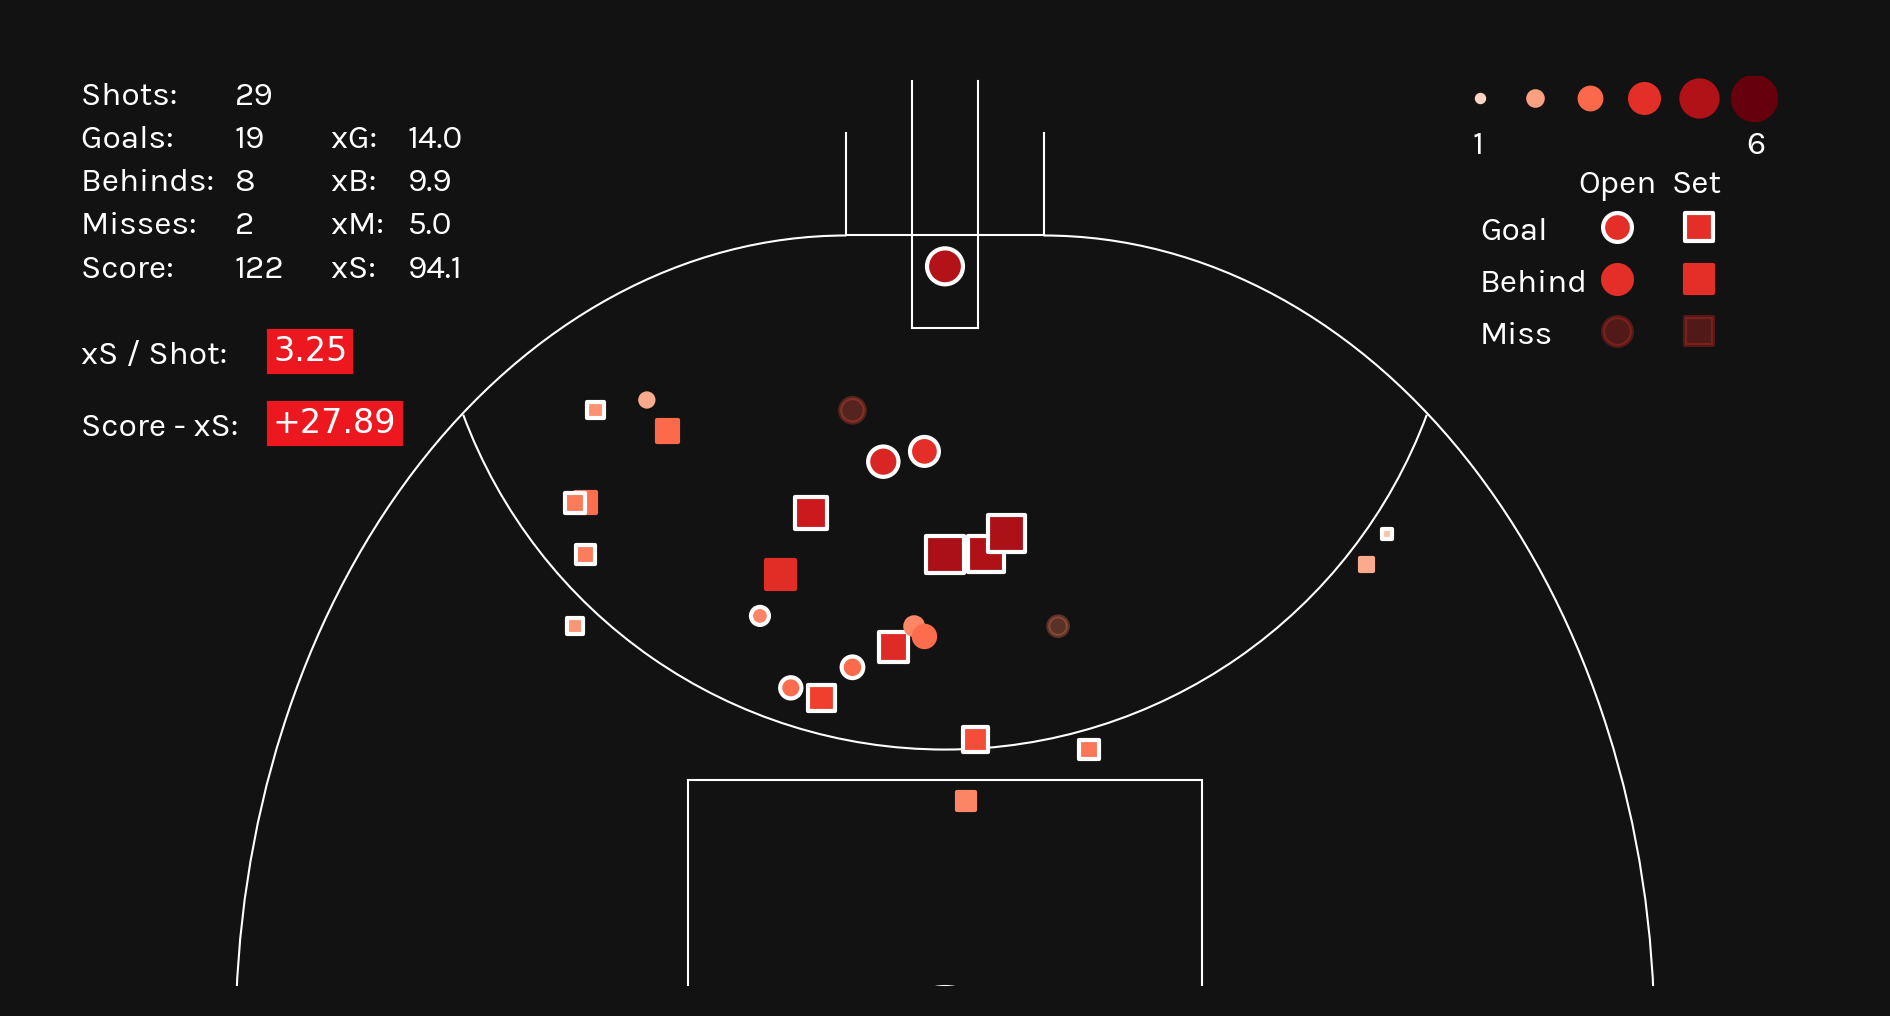

In [6]:
match_id = match_id = "202101_BrisbaneLions_Sydney"
team = "Sydney"
match_data = get_match(df_shots, match_id)
pitch_width, pitch_length = get_venue_dimensions(df_shots, match_id)
team_data = get_team(match_data, team)

fig, ax = plot_vertical_shot_map(team_data, pitch_width, pitch_length)

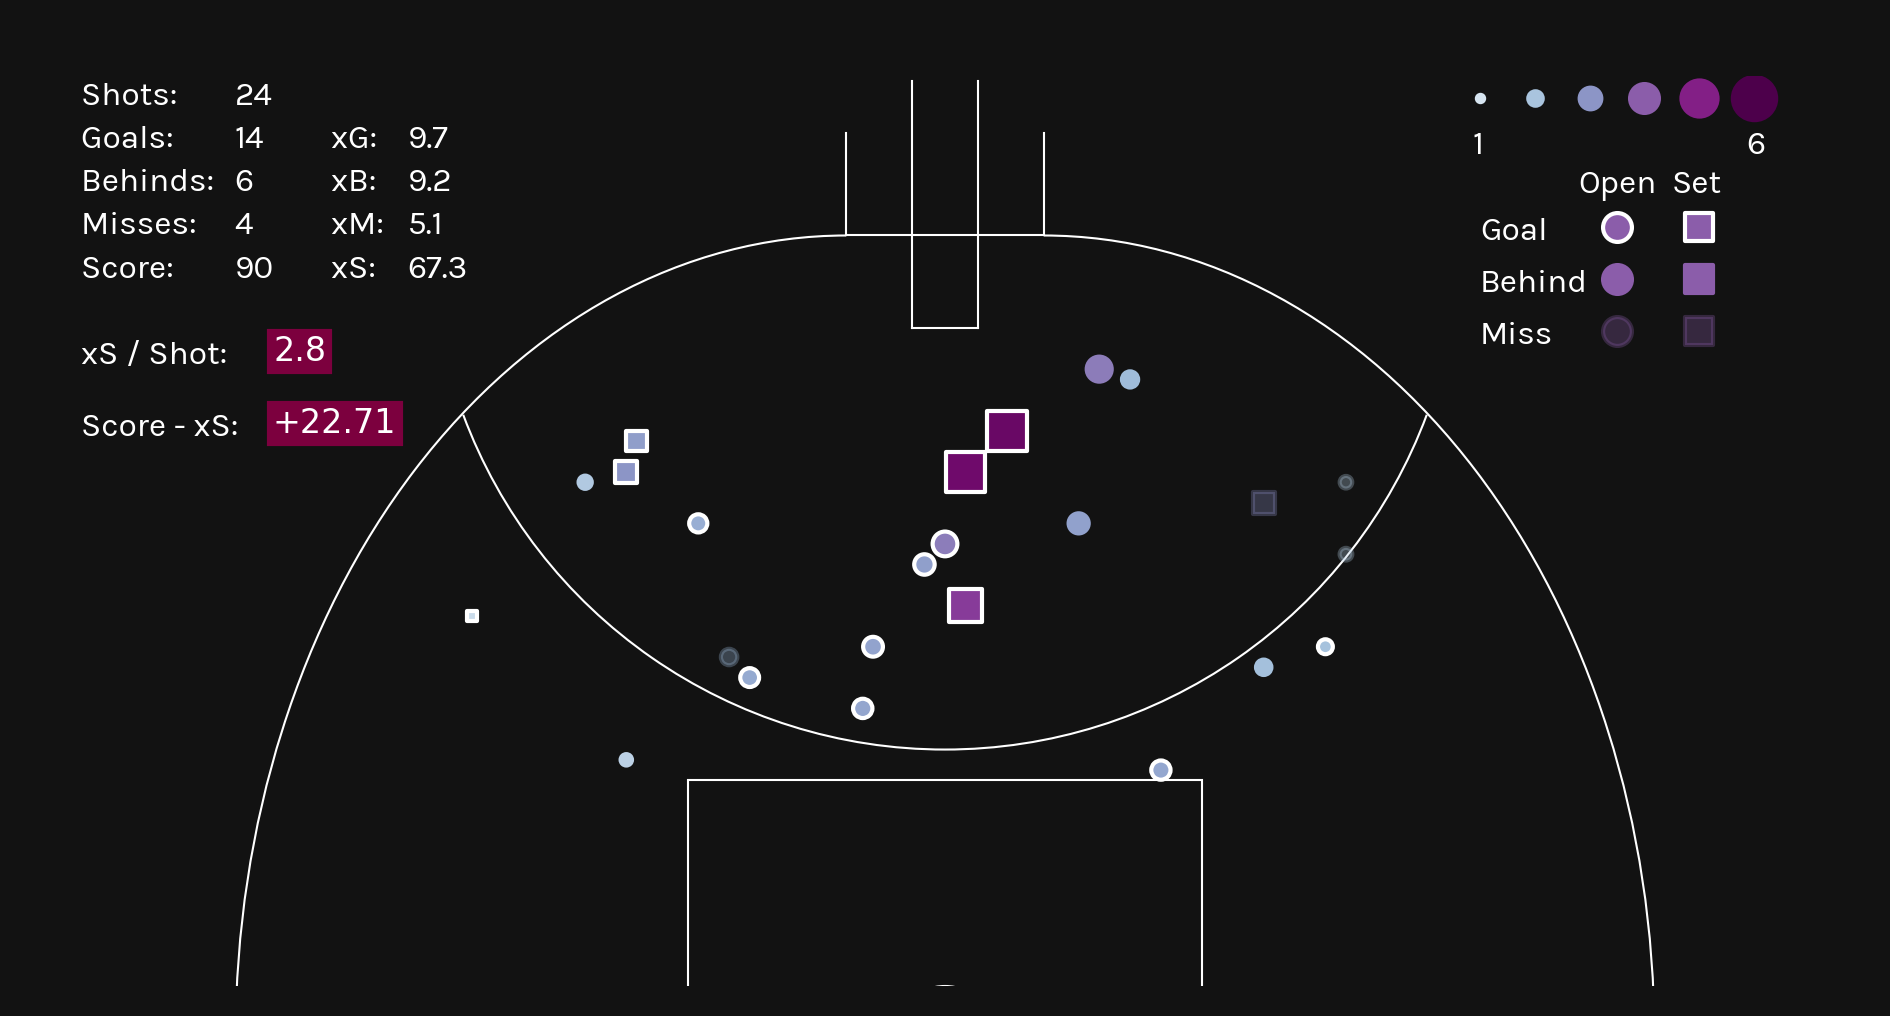

In [7]:
match_id = match_id = "202101_BrisbaneLions_Sydney"
team = "Brisbane Lions"
match_data = get_match(df_shots, match_id)
pitch_width, pitch_length = get_venue_dimensions(df_shots, match_id)
team_data = get_team(match_data, team)

fig, ax = plot_vertical_shot_map(team_data, pitch_width, pitch_length)

Plot Expected Score per Team - Full Season

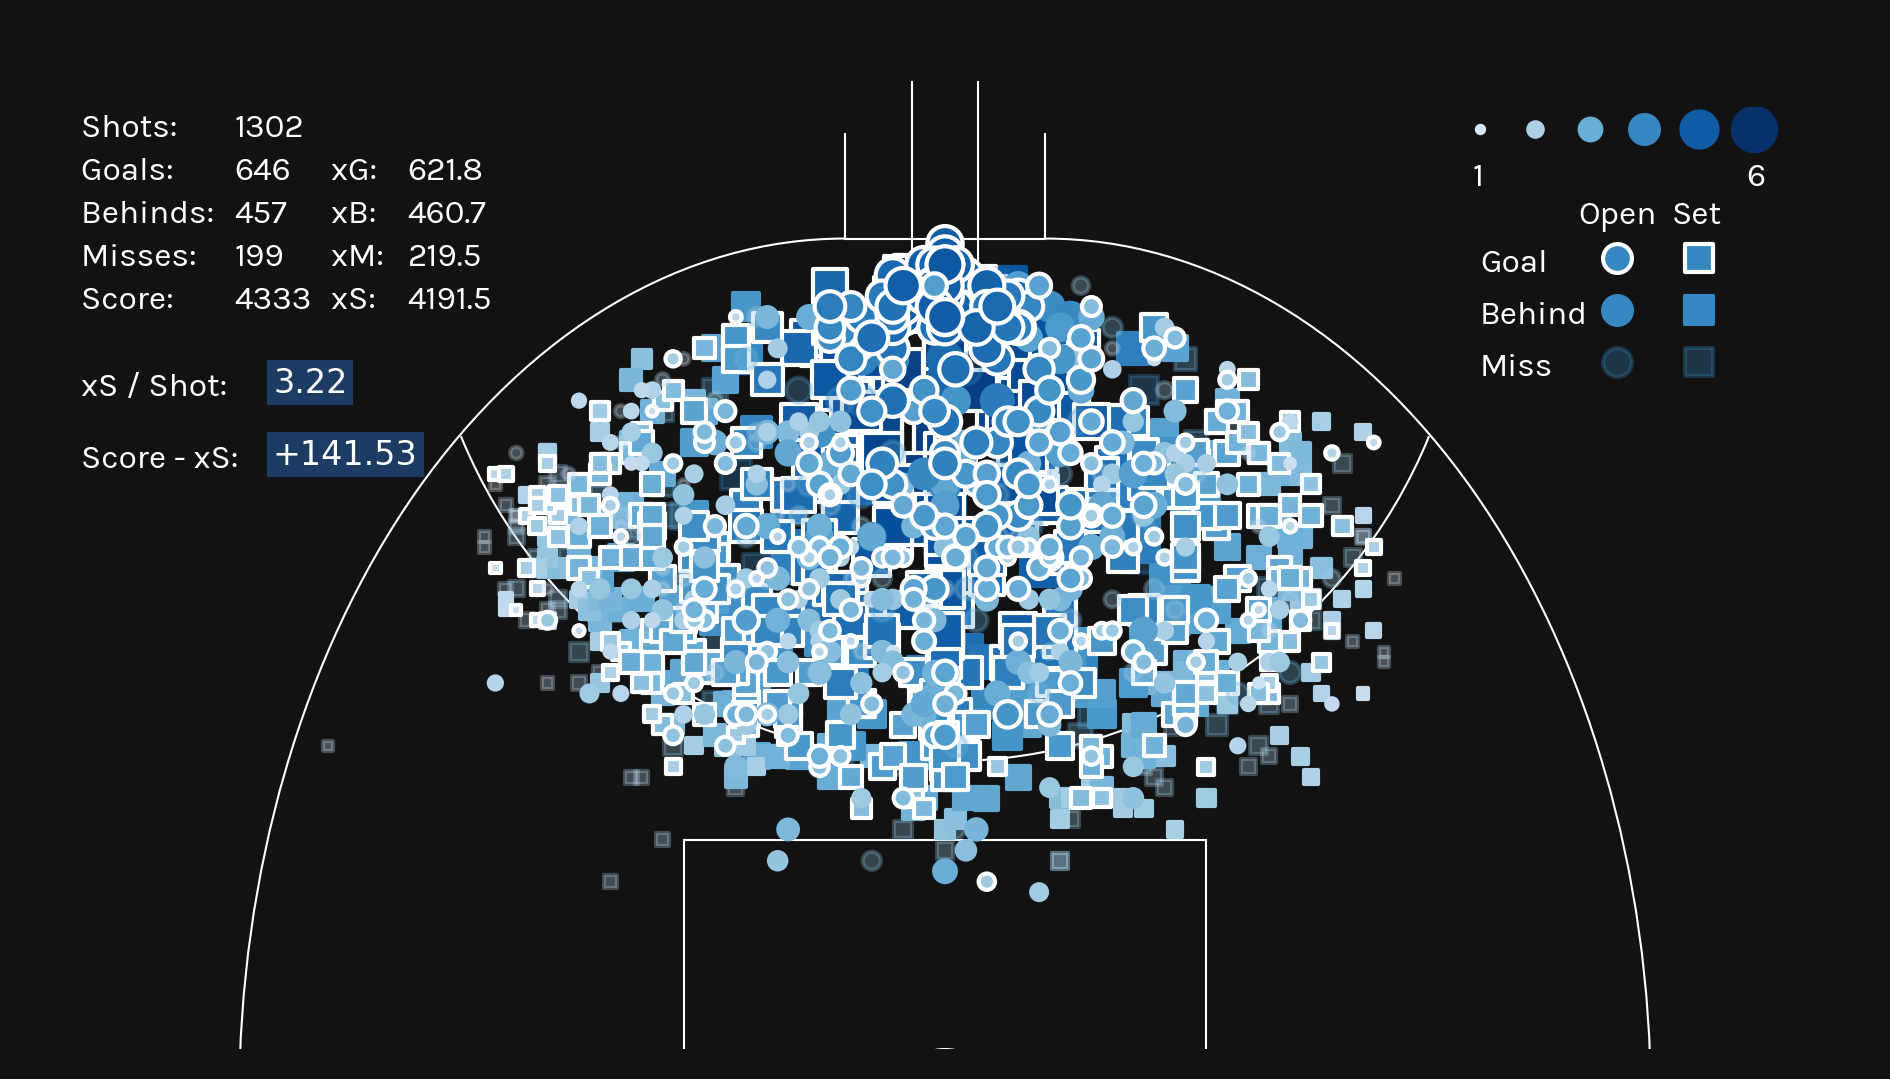

In [8]:
team = "Geelong"
team_data = get_team(df_shots, team)
pitch_width, pitch_length = 135, 165

fig, ax = plot_vertical_shot_map(team_data, pitch_width, pitch_length)

Plot Expected Score per Player

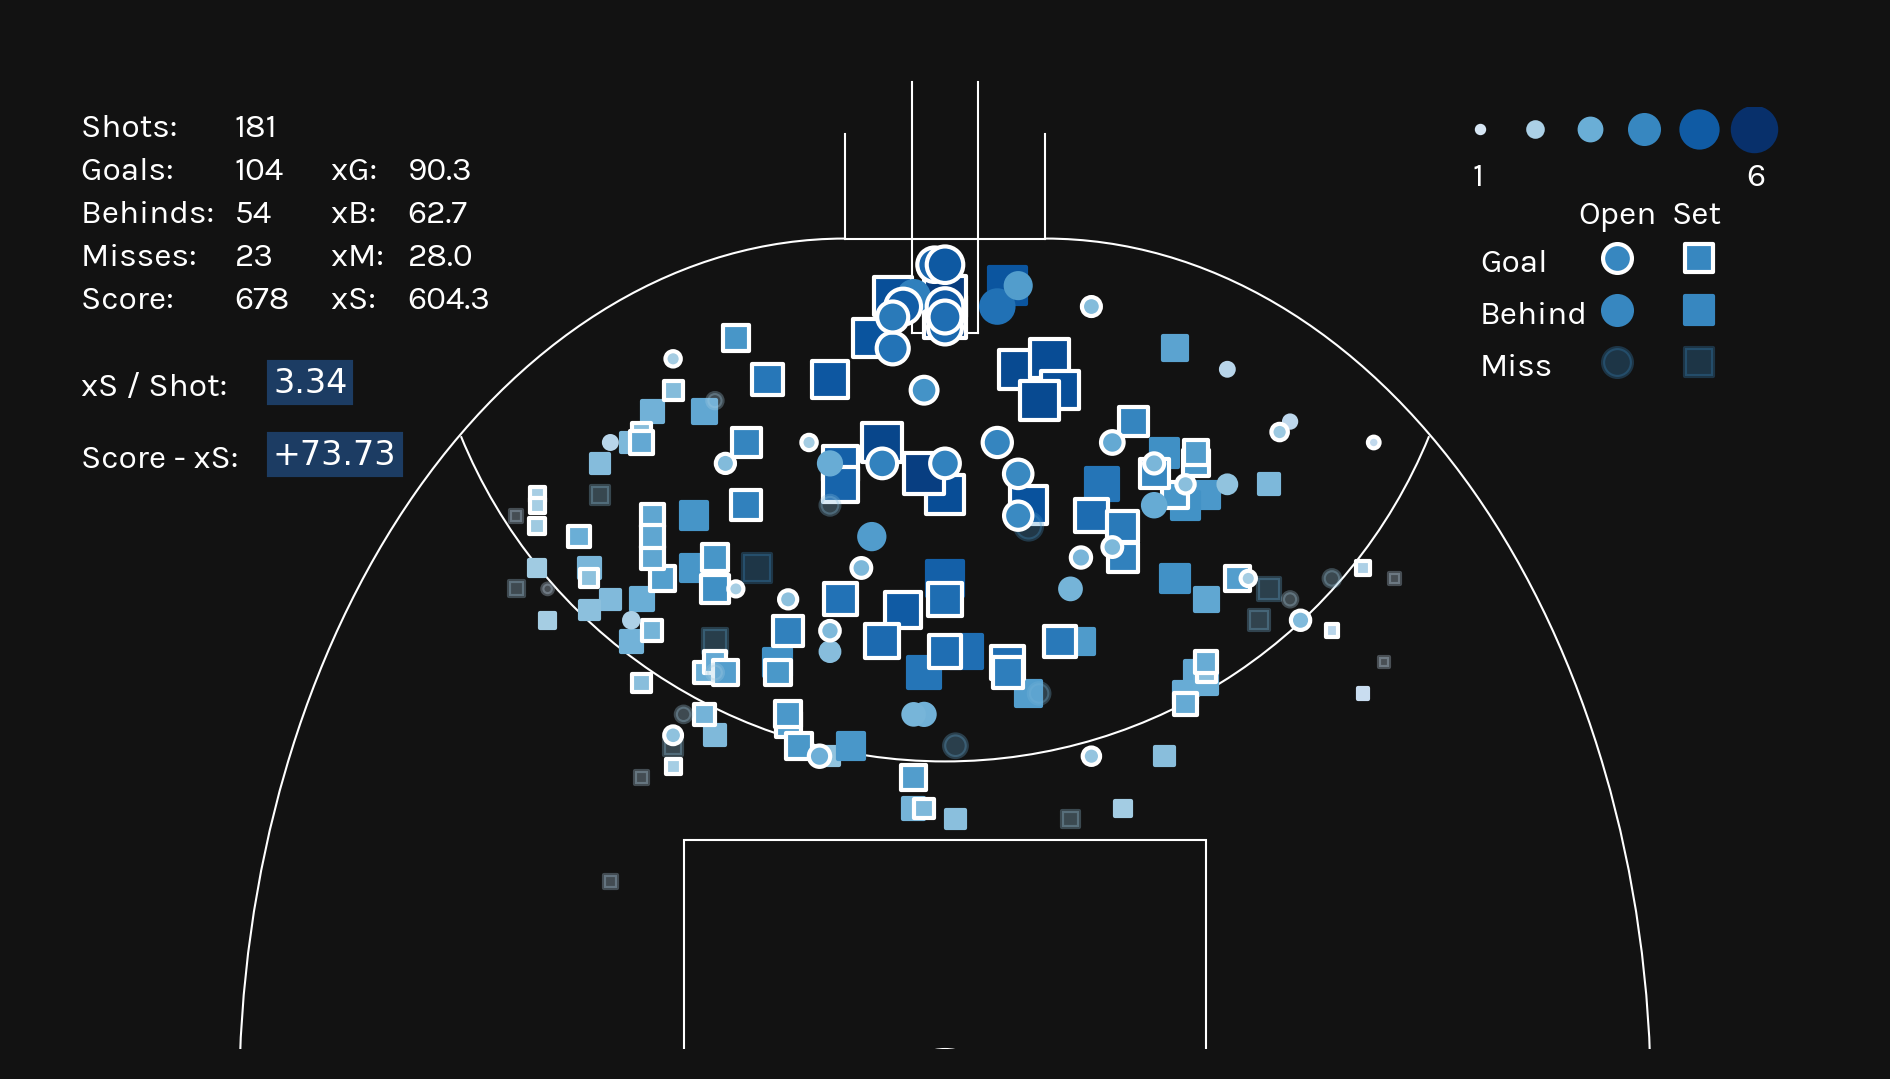

In [9]:
player = "Jeremy Cameron"
player_data = get_player(df_shots, player)
pitch_width, pitch_length = 135, 165

fig, ax = plot_vertical_shot_map(player_data, pitch_width, pitch_length)

Plot Expected Score per Player - Single Season

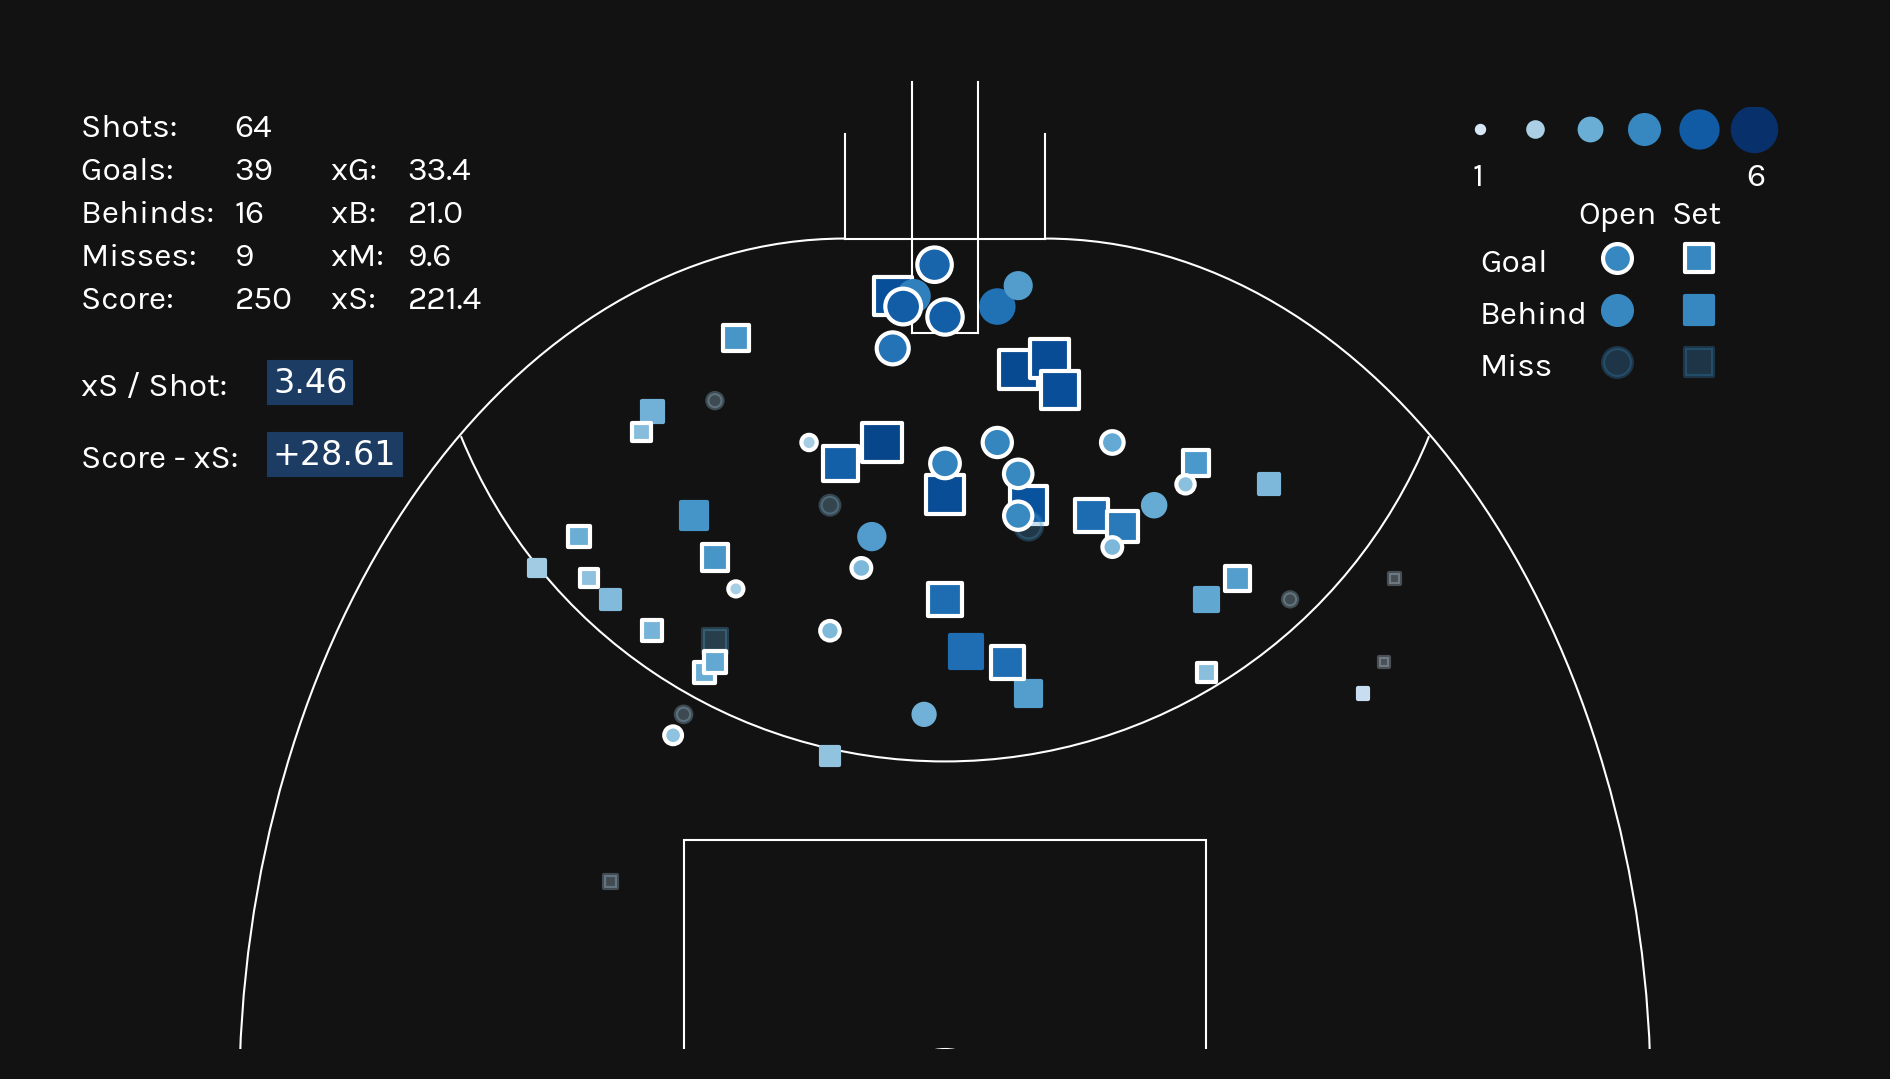

In [10]:
player = "Jeremy Cameron"
year = 2021
player_data = get_year(get_player(df_shots, player), year)
pitch_width, pitch_length = 135, 165

fig, ax = plot_vertical_shot_map(player_data, pitch_width, pitch_length)

Plot Expected Score per Player - Add Title

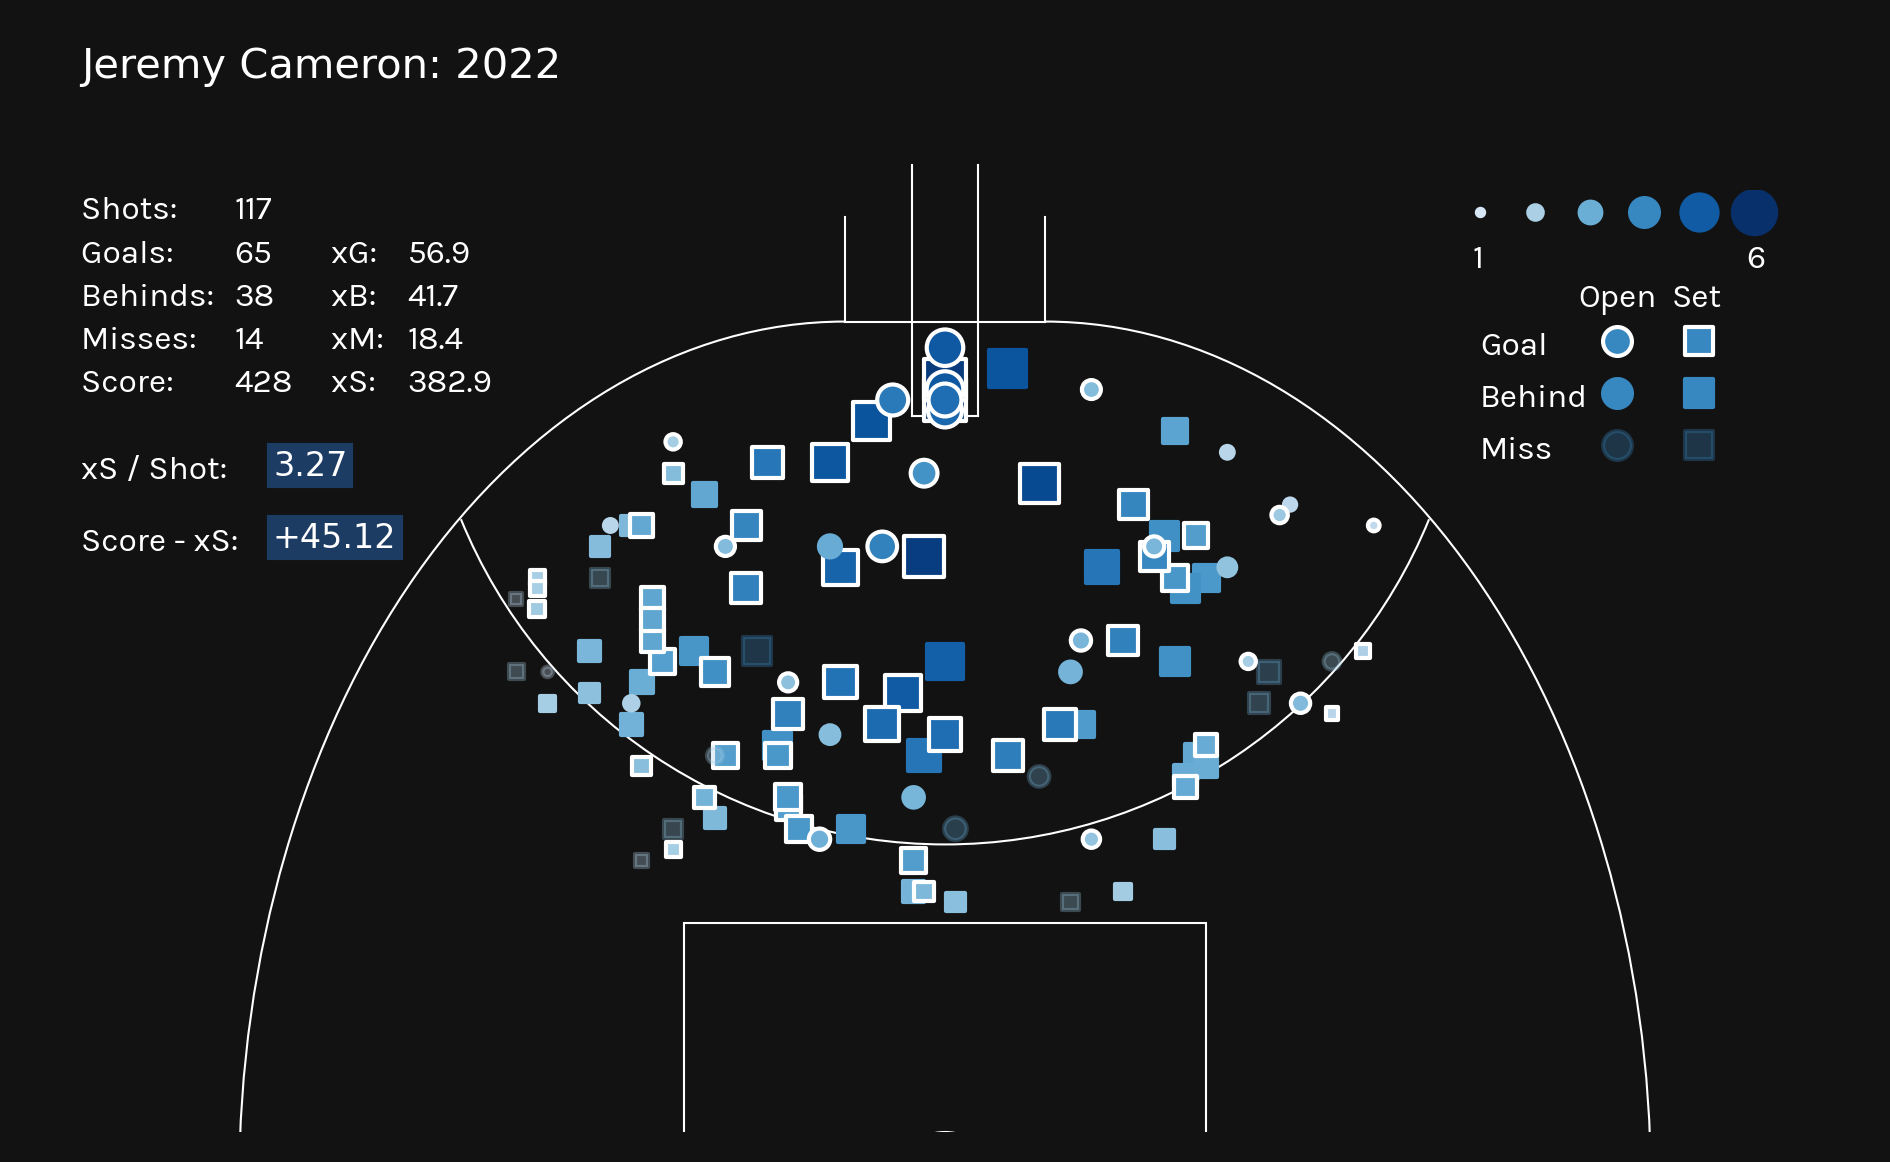

In [13]:
player = "Jeremy Cameron"
year = 2022
player_data = get_year(get_player(df_shots, player), year)
pitch_width, pitch_length = 135, 165

fig, ax = plot_vertical_shot_map(player_data, pitch_width, pitch_length)
fig_text(0.05, 0.9, s=f'{player}: {year}')

plt.savefig(
	"figures/20230719_jeremy_cameron_shot_map.png",
	dpi = 600,
	facecolor = "#121212",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)